In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
# /Users/seyfal/Desktop/CS412/Final Project/apartments_for_rent_classified_100K.csv (Seyfal's Dataset Path)
# /Users/mahal/Documents/GitHub/ApartmentML/apartments_for_rent_classified_100K.csv (Mahalaxmi's Dataset Path)
df = pd.read_csv('/Users/mahal/Documents/GitHub/ApartmentML/apartments_for_rent_classified_100K.csv',
                 sep=';', encoding='ISO-8859-1', low_memory=False)

# Trim whitespace from column names
df.columns = df.columns.str.strip()

# Display the cleaned column names
print(df.columns)

# Dropping irrelevant columns
df = df.drop(['id', 'category', 'title', 'body', 'amenities', 'currency', 'fee', 'has_photo', 'price_display', 'price_type', 'address', 'source', 'time', 'cityname', 'state', 'pets_allowed'], axis=1)

df.head()

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


,bathrooms,bedrooms,price,square_feet,latitude,longitude
0,1.0,1.0,2195.0,542,33.8520,-118.3759
1,1.5,3.0,1250.0,1500,37.0867,-76.4941
2,2.0,3.0,1395.0,1650,35.8230,-78.6438
3,1.0,2.0,1600.0,820,38.3622,-121.9712
4,1.0,1.0,975.0,624,35.1038,-106.6110


In [2]:
# remove whitespace from all columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Verify if 'bathrooms' column exists and then fill null values with 1
if 'bathrooms' in df.columns:
    # convert 'bathrooms' to float, if the variable is "none" convert it to 1
    df['bathrooms'] = df['bathrooms'].replace('null', 1).astype(float)

# Verify if 'bedrooms' column exists and then fill null values with 1
if 'bedrooms' in df.columns:
    # delete the rows with 'bedrooms' as "none"
    df = df[df['bedrooms'] != 'null']
    
if 'latitude' in df.columns:
    # delete the rows with 'latitude' as "none"
    df = df[df['latitude'] != 'null']
    
if 'longitude' in df.columns:
    # delete the rows with 'longitude' as "none"
    df = df[df['longitude'] != 'null']
    
# Check if 'pets_allowed' exists before encoding
if 'pets_allowed' in df.columns:
    # If there are NaN values in 'pets_allowed', replace them with 'None' first
    df['pets_allowed'] = df['pets_allowed'].fillna('None')
    encoder = OneHotEncoder(handle_unknown='ignore')
    pets_encoded = encoder.fit_transform(df[['pets_allowed']])
    pets_encoded_df = pd.DataFrame(pets_encoded.toarray(), columns=encoder.get_feature_names_out(['pets_allowed']))
    df = pd.concat([df.drop(['pets_allowed'], axis=1), pets_encoded_df], axis=1)

# Encode 'cityname' if it exists
if 'cityname' in df.columns:
    encoder = OneHotEncoder(handle_unknown='ignore')
    cityname_encoded = encoder.fit_transform(df[['cityname']])
    cityname_encoded_df = pd.DataFrame(cityname_encoded.toarray(), columns=encoder.get_feature_names_out(['cityname']))
    df = pd.concat([df.drop('cityname', axis=1), cityname_encoded_df], axis=1)

# Encode 'state' if it exists
if 'state' in df.columns:
    state_encoded = encoder.fit_transform(df[['state']])
    state_encoded_df = pd.DataFrame(state_encoded.toarray(), columns=encoder.get_feature_names_out(['state']))
    df = pd.concat([df.drop(['state'], axis=1), state_encoded_df], axis=1)

# Display the first 25 rows of the DataFrame to verify changes
df.head(25)

,bathrooms,bedrooms,price,square_feet,latitude,longitude
0,1.0,1.0,2195.0,542,33.8520,-118.3759
1,1.5,3.0,1250.0,1500,37.0867,-76.4941
2,2.0,3.0,1395.0,1650,35.8230,-78.6438
3,1.0,2.0,1600.0,820,38.3622,-121.9712
4,1.0,1.0,975.0,624,35.1038,-106.6110
5,1.5,2.0,1250.0,965,35.1038,-106.6110
6,2.0,2.0,1600.0,1120,37.0451,-76.3664
7,2.0,2.0,1300.0,947,39.6894,-105.1119
8,1.0,2.0,795.0,600,38.3454,-81.6219
9,2.0,2.0,2150.0,1005,34.2551,-118.5976


In [3]:
# Define the features and the target
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop rows with any NaN values
df = df.dropna()

# Check again for any remaining NaN values
if df.isnull().values.any():
    print("There are still NaN values in the dataset.")
else:
    print("No NaN values in the dataset.")

# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify no NaN values in the training and testing sets
print("NaN in X_train:", X_train.isnull().values.any())
print("NaN in X_test:", X_test.isnull().values.any())
print("NaN in y_train:", y_train.isnull().values.any())
print("NaN in y_test:", y_test.isnull().values.any())

df.head(50)

No NaN values in the dataset.
NaN in X_train: False
NaN in X_test: False
NaN in y_train: False
NaN in y_test: False


,bathrooms,bedrooms,price,square_feet,latitude,longitude
0,1.0,1.0,2195.0,542,33.8520,-118.3759
1,1.5,3.0,1250.0,1500,37.0867,-76.4941
2,2.0,3.0,1395.0,1650,35.8230,-78.6438
3,1.0,2.0,1600.0,820,38.3622,-121.9712
4,1.0,1.0,975.0,624,35.1038,-106.6110
5,1.5,2.0,1250.0,965,35.1038,-106.6110
6,2.0,2.0,1600.0,1120,37.0451,-76.3664
7,2.0,2.0,1300.0,947,39.6894,-105.1119
8,1.0,2.0,795.0,600,38.3454,-81.6219
9,2.0,2.0,2150.0,1005,34.2551,-118.5976


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate and display the MSE and R² score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (without city/state): {mse_rf}")
print(f"Random Forest R² Score (without city/state): {r2_rf}")


Random Forest Mean Squared Error (without city/state): 137580.3695017118
Random Forest R² Score (without city/state): 0.8122102766208539


In [5]:
# Display actual vs. predicted prices
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
comparison.head(25)

,Actual,Predicted
16789,1835.0,1853.087599
18419,2995.0,2959.518770
14002,1813.0,1865.290833
78509,2035.0,2020.783333
60293,575.0,766.133333
61929,1450.0,1479.327500
97674,740.0,827.310000
88338,1350.0,1790.918738
98091,3795.0,3593.023333
77985,1152.0,1318.607833


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R² Score: {r2}")

Linear Regression Mean Squared Error: 574818.0149480907
Linear Regression R² Score: 0.21540466556815907


In [7]:
# Display actual vs. predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
comparison_df.head(25)  # Display the first 25 comparisons

,Actual Price,Predicted Price
16789,1835.0,1760.855019
18419,2995.0,1900.721371
14002,1813.0,1461.624035
78509,2035.0,1307.618082
60293,575.0,1416.030001
61929,1450.0,1320.986669
97674,740.0,1199.827639
88338,1350.0,1497.576071
98091,3795.0,2478.730190
77985,1152.0,1136.052600


In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
import memory_profiler


def gradient_boosting_regressor(gbr):
    # Time to train the model
    start_time_train = time.time()
    gbr.fit(X_train, y_train)
    end_time_train = time.time()
    time_taken_train = end_time_train - start_time_train

    # Predict on test set & testing time for model
    start_time_test = time.time()
    y_pred_gbr = gbr.predict(X_test)
    end_time_test = time.time()
    time_taken_test = end_time_test - start_time_test

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred_gbr)
    print(f"Gradient Boosting Regressor Mean Squared Error (MSE): {mse}")

    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred_gbr)
    print(f"Gradient Boosting Regressor R²: {r_squared}")

    # Print results
    print("Time taken to train Gradient Boosting Regressor Model:",
      time_taken_train, "seconds")
    print("Time taken to test Gradient Boosting Regressor Model:",
      time_taken_test, "seconds")
    
    return y_pred_gbr

   
# Instantiate & train Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=300,
                                learning_rate=0.35,
                                random_state=100,
                                max_features=5)

# Call memory_usage with the function and get memory usage
mem_usage = memory_profiler.memory_usage(
    (gradient_boosting_regressor, (gbr,), {}))

print(
    f"Memory usage (in MB) for Gradient Boosting Regressor Model: {max(mem_usage)}")

Gradient Boosting Regressor Mean Squared Error (MSE): 175620.72143712107
Gradient Boosting Regressor R²: 0.7602872646892208
Time taken to train Gradient Boosting Regressor Model: 22.9030704498291 seconds
Time taken to test Gradient Boosting Regressor Model: 0.07492256164550781 seconds
Memory usage (in MB) for Gradient Boosting Regressor Model: 679.6015625


Gradient Boosting Regressor Mean Squared Error (MSE): 175620.72143712107
Gradient Boosting Regressor R²: 0.7602872646892208
Time taken to train Gradient Boosting Regressor Model: 23.65886402130127 seconds
Time taken to test Gradient Boosting Regressor Model: 0.06024980545043945 seconds


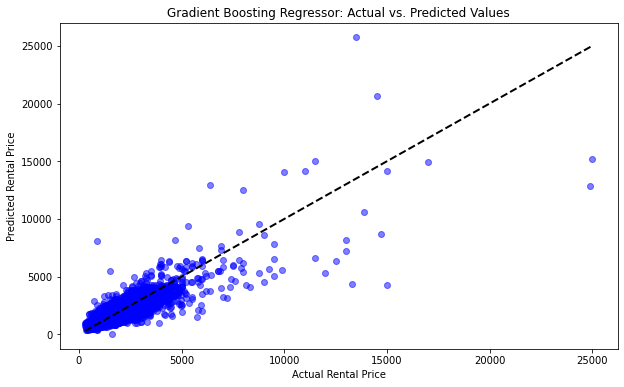

In [9]:
y_pred_gbr = gradient_boosting_regressor(gbr) # used below

# Display actual vs. predicted prices
comparison_df = pd.DataFrame(
    {'Actual Price': y_test, 'Predicted Price': y_pred_gbr})
comparison_df.head(25)  # Display the first 25 comparisons

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(),
        y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Rental Price')
plt.ylabel('Predicted Rental Price')
plt.title('Gradient Boosting Regressor: Actual vs. Predicted Values')
plt.show()

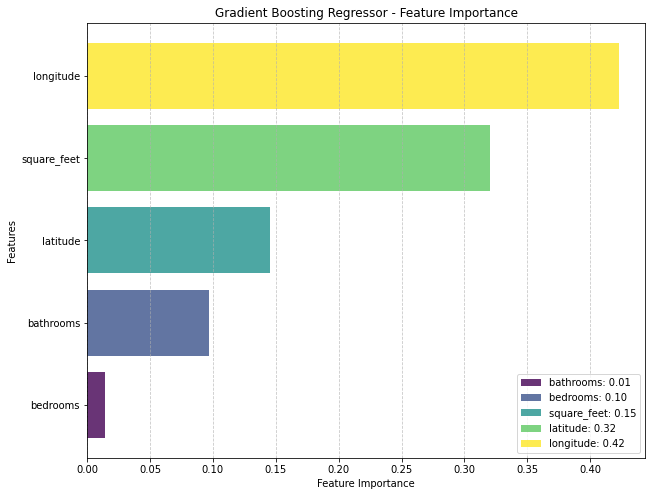

In [10]:
# Feature Importance Plot
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Define colors for bars
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))

# Feature Importance Plot with Legend
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(sorted_idx)),
                feature_importance[sorted_idx], color=colors, alpha=0.8)

# Add feature names as labels
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])

# Create legend
legend_labels = [
    f'{X_train.columns[i]}: {feature_importance[sorted_idx[i]]:.2f}' for i in range(len(sorted_idx))]
plt.legend(bars, legend_labels, loc='lower right')

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()